In [1]:
import os
import numpy as np

In [17]:
imdb=r"C:\Users\User\Downloads\imdb\aclImdb"
train=os.path.join(imdb,'train')
labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name=os.path.join(train,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f=open(os.path.join(dir_name,fname),encoding="utf-8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


In [18]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


In [19]:
maxlen=100
training=500
validation=10000
maxwords=10000

tokenizer= Tokenizer(num_words=maxwords)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)

In [20]:
word_index=tokenizer.word_index
data =pad_sequences(sequences,maxlen=maxlen)
labels =np.asarray(labels)
print("Data",data.shape)
print(labels.shape)

Data (17243, 100)
(17243,)


In [21]:
indicies=np.arange(data.shape[0])
np.random.shuffle(indicies)
data= data[indicies]


In [22]:
labels=labels[indicies]
x_train = data[:training]
y_train = labels[:training]
x_val = data[training: training + validation]
y_val = labels[training: training + validation]

In [10]:
print(x_train.shape)
print(y_train.shape)

(500, 100)
(500,)


In [8]:

glove=r'C:\Users\User\Downloads\gloves'
embedding_Index={}
f=open(os.path.join(glove,'glove.6B.100d.txt'),encoding="utf-8")
for line in f:
    values=line.split()
    words=values[0]
    coefs=np.asarray(values[1:],dtype="float32")
    embedding_Index[words] = coefs
f.close

<function TextIOWrapper.close()>

In [9]:
embedding_dim= 100
embedding_matrix=np.zeros((maxwords,embedding_dim))
for word,i in word_index.items():
    if i < maxwords:
        embedding_vector=embedding_Index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [10]:
from keras.models import Sequential
from keras.layers import Embedding ,Flatten , Dense


In [13]:
model=Sequential()
model.add(Embedding(maxwords,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

In [16]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(x_train,y_train,epochs=10,batch_size=32,
                  validation_data=(x_val,y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
16/16 [==============================] - 4s 181ms/step - loss: 1.0065 - acc: 0.6000 - val_loss: 0.5891 - val_acc: 0.7266
Epoch 2/10
16/16 [==============================] - 2s 146ms/step - loss: 0.5424 - acc: 0.7620 - val_loss: 0.6004 - val_acc: 0.7017
Epoch 3/10
16/16 [==============================] - 3s 170ms/step - loss: 0.4292 - acc: 0.8060 - val_loss: 0.5915 - val_acc: 0.7066
Epoch 4/10
16/16 [==============================] - 2s 155ms/step - loss: 0.3240 - acc: 0.8780 - val_loss: 0.8518 - val_acc: 0.7297
Epoch 5/10
16/16 [==============================] - 2s 150ms/step - loss: 0.2699 - acc: 0.9060 - val_loss: 0.6277 - val_acc: 0.7266
Epoch 6/10
16/16 [==============================] - 2s 144ms/step - loss: 0.2032 - acc: 0.9460 - val_loss: 0.6203 - val_acc: 0.7096
Epoch 7/10
16/16 [==============================] - 2s 130ms/step - loss: 0.1830 - acc: 0.9360 - val_loss: 0.6377 - val_acc: 0.7009
Epoch 8/10
16/16 [==============================] - 2s 116ms/step - loss: 0.

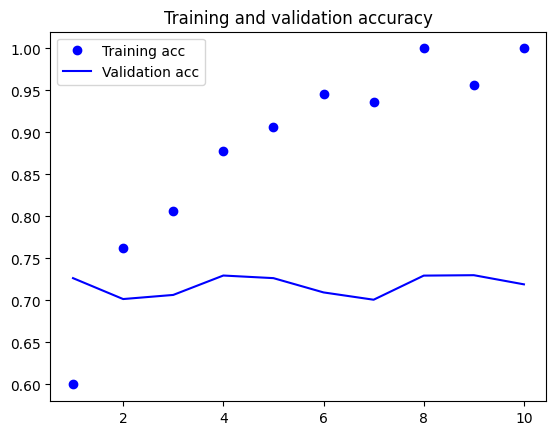

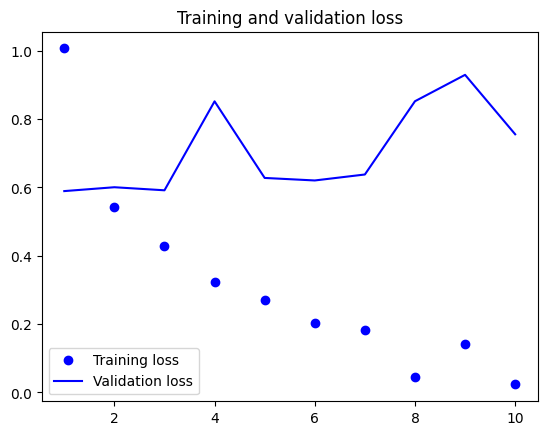

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()